# Visualizing FordGoBike Data(2017)

<a id='intro'></a>
## Introduction 

>Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

<a id='prelim'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import glob
import os
import datetime

In [2]:
df = pd.read_csv(r'C:\Users\User\Desktop\p5\fordgobike-tripdata.csv')

In [3]:
# Showing the first ten rows of the newly combined dataset
df.head(10)

duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   
5          9226  2017-12-31 22:51:00.9180  2018-01-01 01:24:47.1660   
6          4507  2017-12-31 23:49:28.4220  2018-01-01 01:04:35.6190   
7          4334  2017-12-31 23:46:37.1960  2018-01-01 00:58:51.2110   
8          4150  2017-12-31 23:37:07.5480  2018-01-01 00:46:18.3080   
9          4238  2017-12-31 23:35:38.1450  2018-01-01 00:46:17.0530   

   start_station_id                                 start_station_name  \
0                74                              Laguna St at Hayes St   
1               284  Yerba Buena Center for the Arts (Howard St at ...   
2               245                             Downtown Berkeley BART   
3                60                               8th St at Ringold St   
4               239                      Bancroft Way at Telegraph Ave   
5                30     San Francisco Caltrain (Townsend St at 4th St)   
6               259                            Addison St at Fourth St   
7               284  Yerba Buena Center for the Arts (Howard St at ...   
8                20    Mechanics Monument Plaza (Market St at Bush St)   
9                20    Mechanics Monument Plaza (Market St at Bush St)   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.776435              -122.426244              43   
1               37.784872              -122.400876              96   
2               37.870348              -122.267764             245   
3               37.774520              -122.409449               5   
4               37.868813              -122.258764             247   
5               37.776598              -122.395282              30   
6               37.866249              -122.299371             259   
7               37.784872              -122.400876             284   
8               37.791300              -122.399051              20   
9               37.791300              -122.399051              20   

                                    end_station_name  end_station_latitude  \
0  San Francisco Public Library (Grove St at Hyde...             37.778768   
1                              Dolores St at 15th St             37.766210   
2                             Downtown Berkeley BART             37.870348   
3       Powell St BART Station (Market St at 5th St)             37.783899   
4                          Fulton St at Bancroft Way             37.867789   
5     San Francisco Caltrain (Townsend St at 4th St)             37.776598   
6                            Addison St at Fourth St             37.866249   
7  Yerba Buena Center for the Arts (Howard St at ...             37.784872   
8    Mechanics Monument Plaza (Market St at Bush St)             37.791300   
9    Mechanics Monument Plaza (Market St at Bush St)             37.791300   

   end_station_longitude  bike_id   user_type  
0            -122.415929       96    Customer  
1            -122.426614       88    Customer  
2            -122.267764     1094    Customer  
3            -122.408445     2831    Customer  
4            -122.265896     3167  Subscriber  
5            -122.395282     1487    Customer  
6            -122.299371     3539    Customer  
7            -122.400876     1503    Customer  
8            -122.399051     3125    Customer  
9            -122.399051     2543    Customer

In [4]:
# Let's have a look at the data's basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [5]:
#total number of duplicates
df.duplicated().sum()

0

>Its always good to have no duplicates. 

In [6]:
# Checking for null or NaN values
df.isna()

duration_sec  start_time  end_time  start_station_id  \
0              False       False     False             False   
1              False       False     False             False   
2              False       False     False             False   
3              False       False     False             False   
4              False       False     False             False   
...              ...         ...       ...               ...   
519695         False       False     False             False   
519696         False       False     False             False   
519697         False       False     False             False   
519698         False       False     False             False   
519699         False       False     False             False   

        start_station_name  start_station_latitude  start_station_longitude  \
0                    False                   False                    False   
1                    False                   False                    False   
2                    False                   False                    False   
3                    False                   False                    False   
4                    False                   False                    False   
...                    ...                     ...                      ...   
519695               False                   False                    False   
519696               False                   False                    False   
519697               False                   False                    False   
519698               False                   False                    False   
519699               False                   False                    False   

        end_station_id  end_station_name  end_station_latitude  \
0                False             False                 False   
1                False             False                 False   
2                False             False                 False   
3                False             False                 False   
4                False             False                 False   
...                ...               ...                   ...   
519695           False             False                 False   
519696           False             False                 False   
519697           False             False                 False   
519698           False             False                 False   
519699           False             False                 False   

        end_station_longitude  bike_id  user_type  
0                       False    False      False  
1                       False    False      False  
2                       False    False      False  
3                       False    False      False  
4                       False    False      False  
...                       ...      ...        ...  
519695                  False    False      False  
519696                  False    False      False  
519697                  False    False      False  
519698                  False    False      False  
519699                  False    False      False  

[519700 rows x 13 columns]

In [7]:
df.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
dtype: int64

### Cleaning

In [8]:
# Save the original data set and create a new dataset to cleanup
df_clean = df.copy()

Before starting to clean up, there are certains things we should be aware of:
1. Change the format of:
    a. start_time and end_time to datetime format
    b. bike_id,start_station_id,end_station_id to string format
    c. user_type as category
2. We still need to add a few derived columns (start_month,start_date,start_day,start_time_hour,end_time_hour,duration_min) 

###### Code to change the formats

In [9]:
# Changing the format to datetime
grp = ["start_time", "end_time"]
for col in grp:
    df[col] = pd.to_datetime(df[col])
    
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [10]:
# Changing the bike_id, start_station_id and end_station_id to object
grp = ['bike_id','start_station_id','end_station_id']
for a in grp:
    df_clean[a] = df_clean[a].astype('str')

In [11]:
df_clean['user_type'] = df_clean['user_type'].astype('category')

###### Testing if the change is successful

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null category
dtypes: category(1), datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 48.1+ MB


> The changes seems to be successful

In [14]:
df_clean['start_month'] = df_clean.start_time.dt.strftime('%B')
df_clean['start_date'] = df_clean.start_time.dt.strftime('%Y-%m-%d')
df_clean['start_day'] = df_clean.start_time.dt.strftime('%A')
df_clean['start_time_hour'] = df_clean.start_time.dt.hour
df_clean['end_time_hour'] = df_clean.end_time.dt.hour
df_clean['duration_min'] = df_clean.duration_sec/60
df_clean['duration_min'] = df_clean.duration_min.astype(int)

###### Testing if the columns are added

In [15]:
for i,v in enumerate(df_clean.columns):
    print(i,v)

0 duration_sec
1 start_time
2 end_time
3 start_station_id
4 start_station_name
5 start_station_latitude
6 start_station_longitude
7 end_station_id
8 end_station_name
9 end_station_latitude
10 end_station_longitude
11 bike_id
12 user_type
13 start_month
14 start_date
15 start_day
16 start_time_hour
17 end_time_hour
18 duration_min


> All the columns successfully added

##### Save the cleaned data set to a new file

In [16]:
df_clean.to_csv('fordgo_master_clean.csv', index = False)

<a id='univariate'></a>
## Univariate Exploration

> In this section, I investigate distributions of individual variables. This is also in preparation to look at the relationships between variables.

(-1.1011849206665532,
 1.1191211496175568,
 -1.1096091478031753,
 1.1106969224809347)

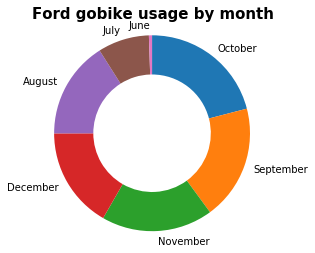

In [17]:
sorted_counts = df_clean['start_month'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width':0.4})
plt.title('Ford gobike usage by month', fontsize=15, fontweight='bold')
plt.axis('square')

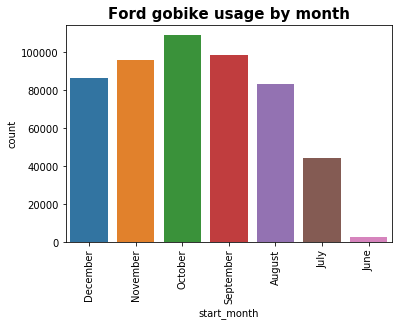

In [18]:
fig = plt.figure()
ax = fig.add_axes([0.125,0.125,0.755,0.755])
plt.title('Ford gobike usage by month', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
sb.countplot(data=df_clean, x = 'start_month', ax=ax)

###### Observation 1: From the above graphs, it is clear that the number of trips reaches peak during the month of October. The stats are the least during the month of June and it raises greatly until October , where it sees the peak and then a gradually decrease in the next two months.

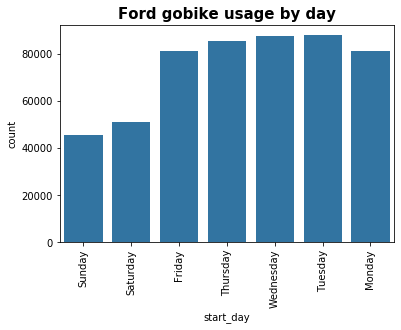

In [19]:
base_color = sb.color_palette()[0]
plt.title('Ford gobike usage by day', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
sb.countplot(data = df_clean, x = 'start_day', color = base_color)

###### Observation 2: Tuesdays and Wednesdays are the days where the bike sharing system seem to be most used , however Mondays, Thursdays and Fridays are very close to the top numbers. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.

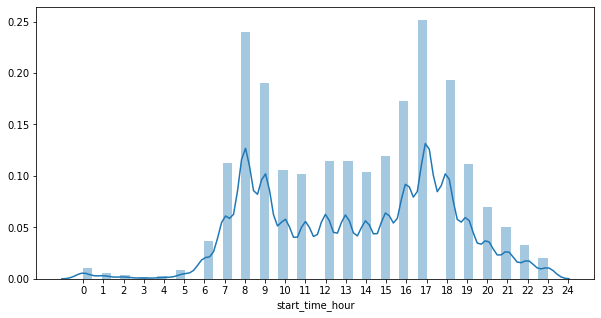

In [20]:
plt.figure(figsize=(10,5))
plt.xticks(range(0,25))
sb.distplot(df_clean['start_time_hour'])

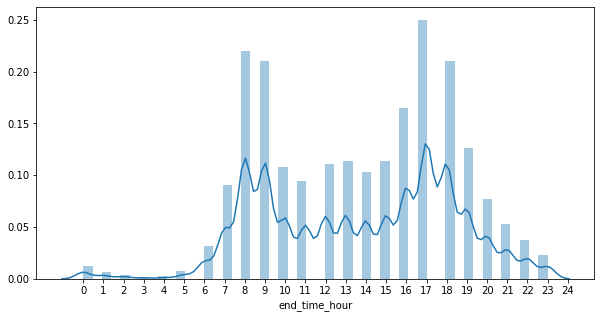

In [21]:
plt.figure(figsize=(10,5))
plt.xticks(range(0,25))
sb.distplot(df_clean['end_time_hour'])

##### Observation 3: The bikes usage seem to reach the peak during the hours 8-9 ( 8AM - 9AM) and 17-18 (5PM - 6PM) , which is a typical workday in the United States. This furthers the suggestion that the bikes are being used primarily for commuting to and from the house to the office. 

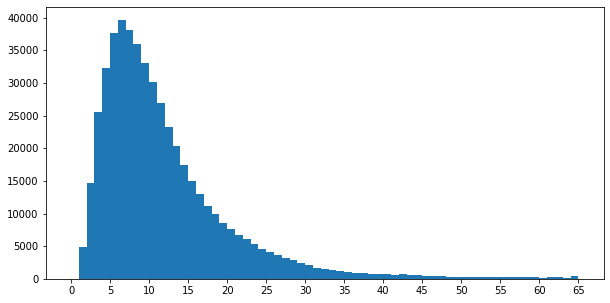

In [22]:
ticks = np.arange(0, 66, 5)
bins = np.arange(0, 66, 1)
plt.figure(figsize=(10,5))
plt.xticks(ticks, ticks)
plt.hist(data = df_clean, x = 'duration_min', bins = bins);

###### Observation 4: Looking at the histogram , it seems that majority of the trips are less than 15 minutes. Most rides fall in between the 3 - 11 minute range. This might suggests riders are taking the bikes only for short distances. 

<a id='bivariate'></a>
## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the
data.

In [23]:
# Customers vs Subscribers
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

(-1.1362222153714074,
 1.1544133658381224,
 -1.107996722072388,
 1.1826388591371417)

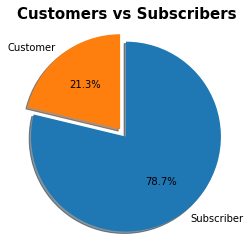

In [24]:
# Customers vs Subscribers Visuals
# pie chart
sorted_vals = df_clean.user_type.value_counts()/df_clean.shape[0]
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True)
plt.title("Customers vs Subscribers", y=1, fontsize=15, fontweight='bold')
plt.axis('square')

##### Observation 1: It is clear from the above pie chart that the majority of users for the Ford Go Bike System are Subscribers.

Text(0, 0.5, 'Avg. Trip Duration in Minute')

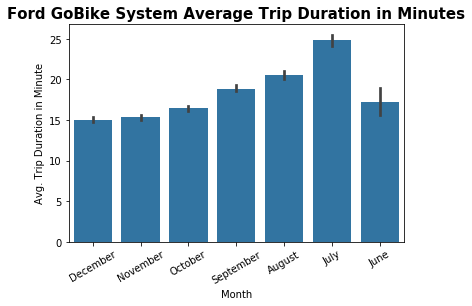

In [25]:
sb.barplot(data=df_clean, x='start_month', y='duration_min', color=base_color)
plt.xticks(rotation=30)
plt.title("Ford GoBike System Average Trip Duration in Minutes", y=1, fontsize=15, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Avg. Trip Duration in Minute')

##### Observation 2: July seems to be the month with the maximum average trip duration. After july , the average time decreases gradually until the end of the year.

Text(0, 0.5, 'Number of bike trips')

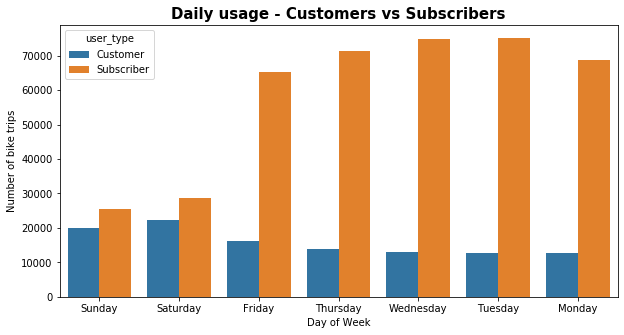

In [26]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(10,5))
sb.countplot(data=df_clean, x='start_day', hue='user_type');
plt.title("Daily usage - Customers vs Subscribers", y=1, fontsize=15, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of bike trips')

##### Observation 3: The above plot shows that the customers have a relatively low usage of the bike share system during the weekdays with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

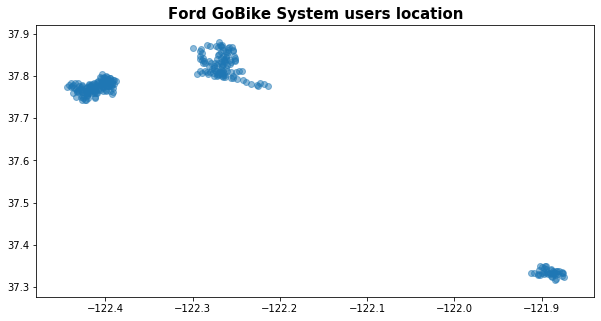

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
data = (df_clean[df_clean.start_station_longitude < -120].
        groupby(['start_station_latitude', 'start_station_longitude']).count().reset_index())
plt.title("Ford GoBike System users location", y=1, fontsize=15, fontweight='bold')
plt.scatter(x=data.start_station_longitude, y=data.start_station_latitude, alpha=0.5)

##### Observation 4: The number of users of the Ford Gobike system is rather split in 3 different areas. After considering the longitude and latitude, the users are mainly in the cities of San Francisco, East Bay and San Jose.

Text(0, 0.5, 'Trip Duration in Minute')

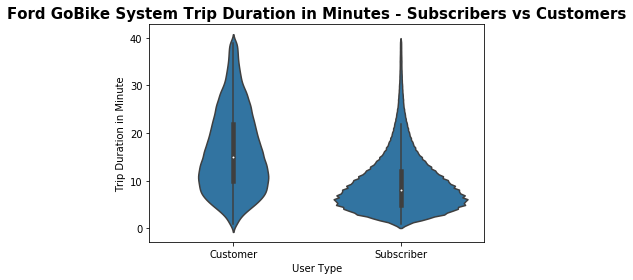

In [28]:
# Violin plot to compare the subscribes and the customers based on Trip duration (min)
data = df_clean.query('duration_min < 40')
sb.violinplot(data=data, x='user_type', y='duration_min', color=base_color, inner='box')
plt.title("Ford GoBike System Trip Duration in Minutes - Subscribers vs Customers", y=1, fontsize=15, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Trip Duration in Minute')

##### Observation 5: The trip duration distribution is much narrower for subscribers compared to customers. It seems like subscribers have a more specific usage or targeted goal riding the bikes compared to customers who vary more and generally rented the bikes for longer.

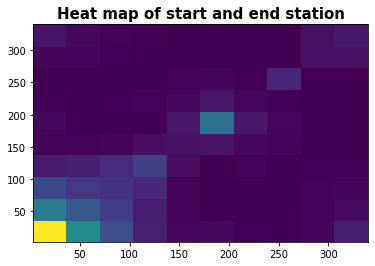

In [29]:
grp = ['start_station_id','end_station_id']
for a in grp:
    df_clean[a] = df_clean[a].astype('int32')

bin_x = np.arange(0.6, 7.3, 0.3)
bin_y = np.arange(12, 61, 3)
plt.title("Heat map of start and end station", y=1, fontsize=15, fontweight='bold')
plt.hist2d(data = df_clean, x = 'start_station_id', y = 'end_station_id');

In [30]:
station = df_clean.query('start_station_id <= 35')['start_station_name'].count()

In [31]:
station

168389

##### Observation 6: The above heat map shows that the maximum nummber of trips have started and ended in stations whose ID is less than 35

<a id='multivariate'></a>
## Multivariate Exploration

> I created plots of three or more variables to investigate the Ford Go Bike data even further.

Text(0, 0.5, 'Avg. Trip Duration in Minute')

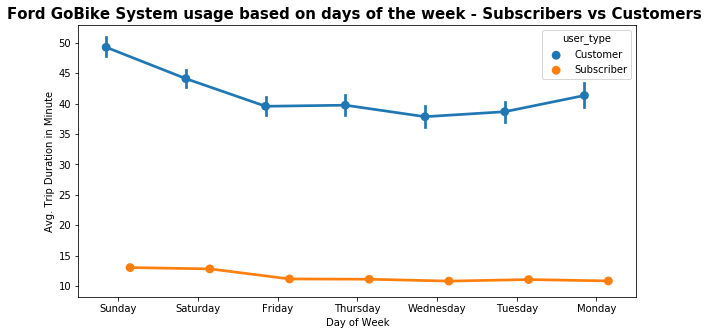

In [32]:
plt.figure(figsize=(10,5))
sb.pointplot(data=df_clean, x='start_day', y='duration_min', hue='user_type', dodge=0.3)
plt.title("Ford GoBike System usage based on days of the week - Subscribers vs Customers ", y=1, fontsize=15, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Avg. Trip Duration in Minute')

##### It can be seen from the above plot that subscribers ride much shorter distance compared to customers on each day of the week. Both user types have an obvious increase of trip duration on Saturdays and Sundays over weekends, especially for casual riders. Subscribers usage seems to be more efficient than customers overall and maintained a very consistent average duration Monday through Friday.

<a id='summary'></a>
## Summary

1. Non-subscribers have a more homogenous pattern of bike usage and help to better utilize the bikes during the day
2. The efficient/short period of usage for subscribers corresponds to their high concentration on rush hours Monday through Friday, indicating the use is primarily for work commute. 
3. The service is pre-dominantly distributed among the three regions - San Francisco, East Bay and San Jose. 
4. Usually the average type spent per trip is more by the customer when compared to the subscriber.
5. Subscribers usually use the service during the weekdays , whereas the customers seem to use it during the weeends.
6. From all the above observations we can infer that, the subscribers are probably those who use the service to get to work or school (as they use the service on weekdays and during the peak hours of the day). The customers, on the other hand, use the service during the weekends, so they are probably just casual users those who use the service for fun purpose.

In [ ]:
!jupyter nbconvert C:\Users\User\Desktop\p5\Communicate_Data.ipynb --to slides --post serve 